## Setup

In [ ]:
!git clone https://github.com/XavierSpycy/NumPyMultilayerPerceptron.git
%cd NumPyMultilayerPerceptron

Cloning into 'NumPyMultilayerPerceptron'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 74 (delta 16), reused 38 (delta 5), pack-reused 17
Receiving objects: 100% (74/74), 87.83 MiB | 20.45 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (30/30), done.
/content/NumPyMultilayerPerceptron


## Toy Example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from model.mlperceptron import Dense, MultilayerPerceptron

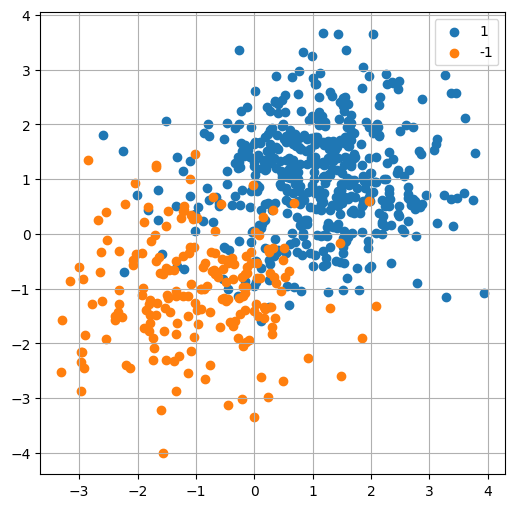

In [ ]:
np.random.seed(3407)
class_1 = np.hstack([np.random.normal( 1, 1, size=(500, 2)),  np.ones(shape=(500, 1))])
class_2 = np.hstack([np.random.normal(-1, 1, size=(200, 2)), -np.ones(shape=(200, 1))])
dataset = np.vstack([class_1, class_2])
X, y = dataset[:,:2], dataset[:,2]

plt.figure(figsize=(6, 6))
plt.scatter(class_1[:,0], class_1[:,1], label='1')
plt.scatter(class_2[:,0], class_2[:,1], label='-1')
plt.grid()
plt.legend()
plt.show()

100%|██████████| 80/80 [01:01<00:00,  1.30it/s]


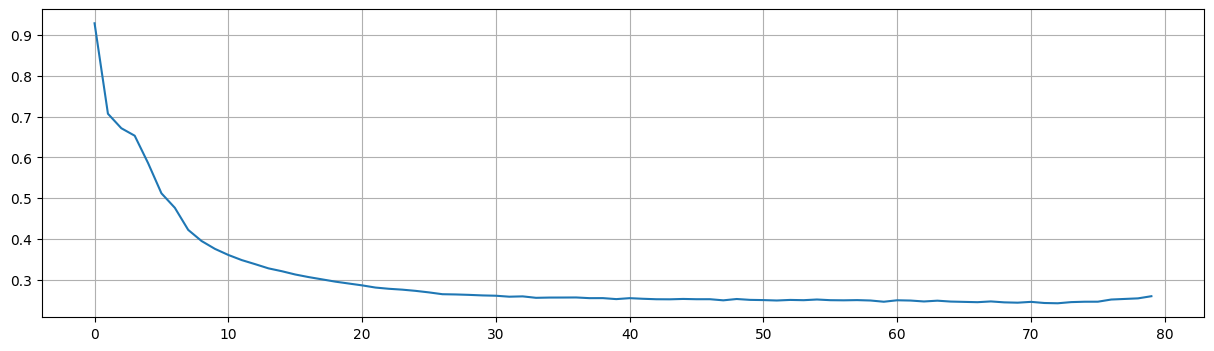

In [ ]:
layers = [
    Dense(2, 4, activation='leaky_relu', init='kaiming_normal', init_params={'mode': 'out'}),
    Dense(4, 3, activation='hardswish', init='xavier_normal'),
    Dense(3, 2, activation='relu', init='kaiming_normal', init_params={'mode': 'in'}),
    Dense(2, 1, activation='tanh', init='xavier_uniform')
]
mlp = MultilayerPerceptron(layers)
mlp.compile(optimizer='Adam',
            loss='MeanSquareError')
mlp.fit(X, y, epochs=80)
loss = mlp.loss_tracker()
plt.figure(figsize=(15,4))
plt.plot(loss)
plt.grid()

Text(0.5, 1.0, 'Predictions')

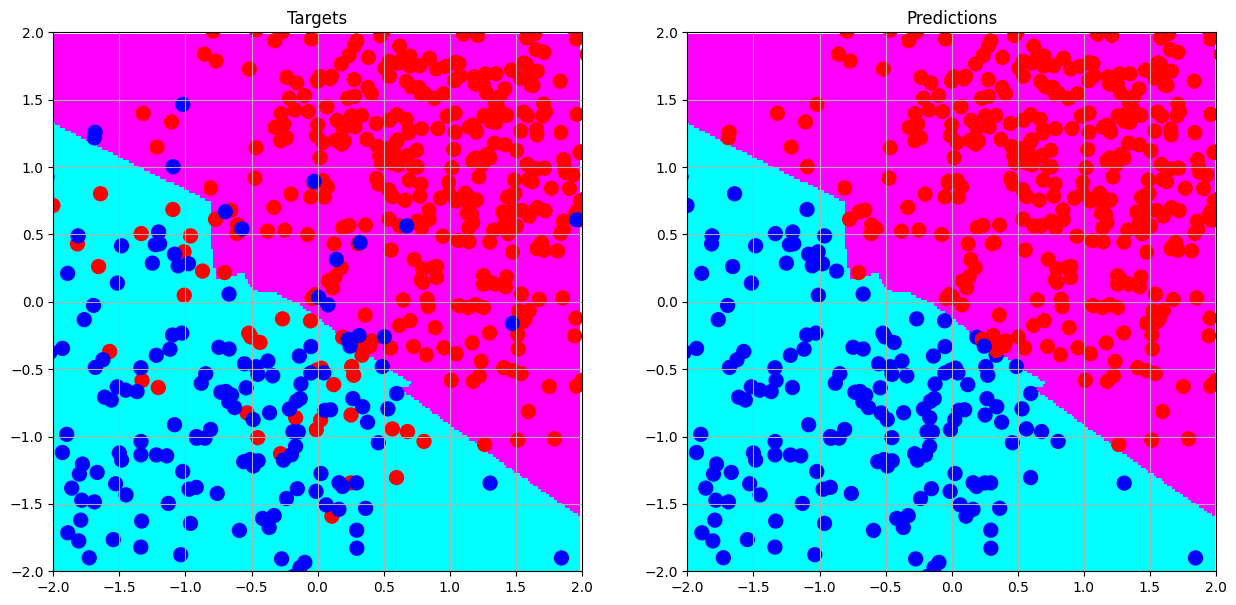

In [ ]:
xx, yy = np.meshgrid(np.arange(-2, 2, .02),np.arange(-2, 2, .02))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pcolormesh(xx, yy, Z>0, cmap='cool')
plt.scatter(X[:,0], X[:,1], c=[['b', 'r'][int(d>0)] for d in y], s=100)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.title('Targets')
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, Z>0, cmap='cool')
plt.scatter(X[:,0], X[:,1], c=[['b', 'r'][int(d>0)] for d in mlp.predict(X)], s=100)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.title('Predictions')

## Pipeline

100%|██████████| 500/500 [58:42<00:00,  7.04s/it]


Training time: 3522.34 second(s).
Loss: 1.34.


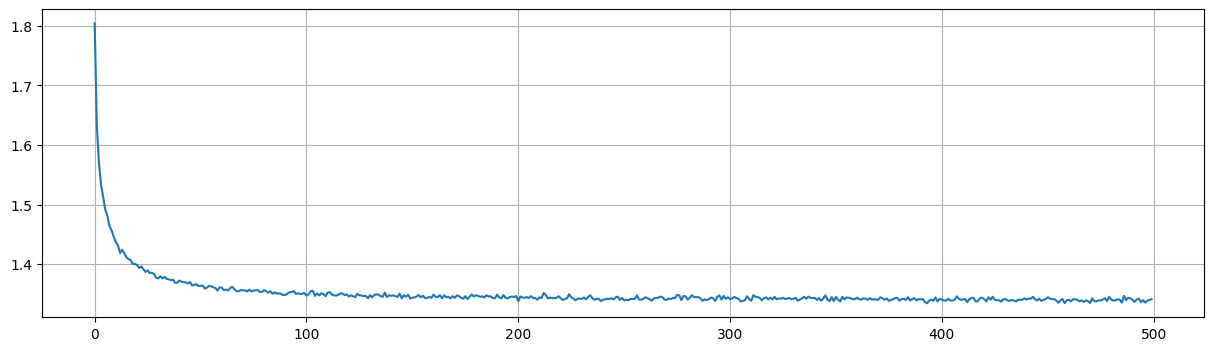

Accuracy on the training set is: 59.61%.
Accuracy on the test set is: 55.61%.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datasets.data_loader import datasets
from model.mlperceptron import MultilayerPerceptron, Dense, Dropout, Adam
from eval.metrics import accuracy

X_train, y_train = datasets(train=True)
X_test, y_test = datasets(train=False)

np.random.seed(3407)

layers = [
    Dense(128, 120, activation='elu', init='kaiming_uniform'),
    Dropout(dropout_rate=0.25),
    Dense(120, 112, activation='elu', init='kaiming_uniform'),
    Dropout(dropout_rate=0.20),
    Dense(112, 96, activation='elu', init='kaiming_uniform'),
    Dropout(dropout_rate=0.15),
    Dense(96, 64, activation='elu', init='kaiming_uniform'),
    Dropout(dropout_rate=0.10),
    Dense(64, 48, activation='elu', init='kaiming_uniform'),
    Dropout(dropout_rate=0.05),
    Dense(48, 32, activation='elu', init='kaiming_uniform'),
    Dense(32, 24, activation='elu', init='kaiming_uniform'),
    Dense(24, 16, activation='elu', init='kaiming_uniform'),
    Dense(16, 10, activation='softmax', init='xavier_uniform')
]

mlp = MultilayerPerceptron(layers)
mlp.compile(optimizer=Adam(lr=1e-3, weight_decay=0.02),
            loss='CrossEntropy')
mlp.fit(X_train, y_train, epochs=500, batch_size=32)
loss = mlp.loss_tracker()
train_time = mlp.training_time()
print(f'Training time: {train_time:.2f} second(s).')
print(f'Loss: {loss[-1]:.2f}.')
plt.figure(figsize=(15, 4))
plt.plot(loss)
plt.grid()
plt.show()

print(f"Accuracy on the training set is: {accuracy(y_train, mlp.predict(X_train)):.2%}." )
print(f"Accuracy on the test set is: {accuracy(y_test, mlp.predict(X_test)):.2%}.")